In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [2]:
dnn_class_config_file = "/Users/dgagne/data/cam_mp_run2_ml_val_1000/DenseNeuralNetwork_DenseNeuralNetwork_classifier_params.csv"
dnn_reg_config_file = "/Users/dgagne/data/cam_mp_run2_ml_val_1000/DenseNeuralNetwork_DenseNeuralNetwork_regressor_params.csv"
dnn_metrics_file = "/Users/dgagne/data/cam_mp_run2_ml_val_1000/DenseNeuralNetwork_DenseNeuralNetwork_metrics.csv"
dnn_class_config = pd.read_csv(dnn_class_config_file)
dnn_reg_config = pd.read_csv(dnn_reg_config_file)
dnn_metrics = pd.read_csv(dnn_metrics_file, index_col="Config").sort_index()
dnn_class_config.index = dnn_metrics.index
dnn_reg_config.index = dnn_metrics.index

In [3]:
class_metrics = pd.merge(dnn_class_config, dnn_metrics, left_index=True, right_index=True)
reg_metrics = pd.merge(dnn_reg_config, dnn_metrics, left_index=True, right_index=True)

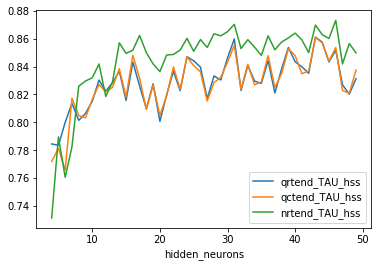

In [77]:
class_metrics.groupby("hidden_neurons")["qrtend_TAU_hss", "qctend_TAU_hss", "nrtend_TAU_hss"].mean().plot()

In [4]:
class_metrics.groupby("activation")["qrtend_TAU_hss", "qctend_TAU_hss", "nrtend_TAU_hss"].mean()

,qrtend_TAU_hss,qctend_TAU_hss,nrtend_TAU_hss
activation,,,
relu,0.872161,0.868050,0.851711
selu,0.847614,0.848348,0.860726
tanh,0.772062,0.771622,0.822666


In [107]:
class_metrics["lr"].max()

0.010098893164401922

In [105]:
class_metrics["lr_bins"] = pd.IntervalIndex(pd.cut(class_metrics["lr"], 
                                                   bins=np.linspace(0.0001, 0.01, 10), right=False)).left

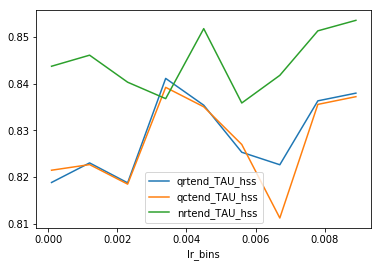

In [108]:
class_metrics.groupby("lr_bins")["qrtend_TAU_hss", "qctend_TAU_hss", "nrtend_TAU_hss"].mean().plot()


In [113]:
view_metric = "hellinger"
group_cols = reg_metrics.columns[reg_metrics.columns.str.contains(view_metric)]
reg_metrics.groupby("activation")[group_cols].mean().dropna(axis=1)

,qctend_TAU_hellinger,qctend_TAU_1_hellinger,qrtend_TAU_hellinger,qrtend_TAU_1_hellinger,nctend_TAU_hellinger,nctend_TAU_1_hellinger,nrtend_TAU_hellinger,nrtend_TAU_-1_hellinger,nrtend_TAU_1_hellinger
activation,,,,,,,,,
relu,0.051238,0.057624,0.053106,0.058178,0.017401,0.017401,0.066172,0.060832,0.082173
selu,0.055656,0.058203,0.053431,0.057375,0.021945,0.021945,0.070659,0.042594,0.090023
tanh,0.069182,0.076476,0.070387,0.076726,0.021168,0.021168,0.084515,0.060129,0.106202


In [88]:
summary_metrics = reg_metrics.groupby("use_noise")[group_cols].agg(["mean", "std", "count"])

In [89]:
summary_metrics

qctend_TAU_mae                 qctend_TAU_0_mae            \
                    mean       std count             mean std count   
use_noise                                                             
0               0.203917  0.045408   473              NaN NaN     0   
1               0.204684  0.040819   527              NaN NaN     0   

          qctend_TAU_1_mae                 qrtend_TAU_mae  ...   \
                      mean       std count           mean  ...    
use_noise                                                  ...    
0                 0.196558  0.065344   473       0.204533  ...    
1                 0.199217  0.051317   527       0.203090  ...    

          nrtend_TAU_mae nrtend_TAU_-1_mae                 nrtend_TAU_0_mae  \
                   count              mean       std count             mean   
use_noise                                                                     
0                    473          0.141249  0.064705   473              NaN   
1                    527          0.144235  0.074700   527              NaN   

                    nrtend_TAU_1_mae                  
          std count             mean       std count  
use_noise                                             
0         NaN     0         0.301061  0.082754   473  
1         NaN     0         0.302443  0.076361   527  

[2 rows x 36 columns]

In [91]:
for var in summary_metrics.columns.levels[0]:
    if ~np.isnan(summary_metrics[var].loc[0, "mean"]):
        tres = ttest_ind_from_stats(summary_metrics[var].loc[0, "mean"],
                     summary_metrics[var].loc[0, "std"],
                     summary_metrics[var].loc[0, "count"],
                     summary_metrics[var].loc[1, "mean"],
                     summary_metrics[var].loc[1, "std"],
                     summary_metrics[var].loc[1, "count"],
                     equal_var=False)
        print(var, tres)

qctend_TAU_mae Ttest_indResult(statistic=-0.27996772644751616, pvalue=0.7795629297985118)
qctend_TAU_1_mae Ttest_indResult(statistic=-0.7100848252715013, pvalue=0.4778368131752262)
qrtend_TAU_mae Ttest_indResult(statistic=0.5512397721367451, pvalue=0.5816039409551557)
qrtend_TAU_1_mae Ttest_indResult(statistic=-0.43607186072846393, pvalue=0.6628917084781318)
nctend_TAU_mae Ttest_indResult(statistic=-1.952679628466052, pvalue=0.051136830783557304)
nctend_TAU_1_mae Ttest_indResult(statistic=-1.952679628466052, pvalue=0.051136830783557304)
nrtend_TAU_mae Ttest_indResult(statistic=0.5255556246164598, pvalue=0.5993168799153634)
nrtend_TAU_-1_mae Ttest_indResult(statistic=-0.677244150124355, pvalue=0.4984082088548699)
nrtend_TAU_1_mae Ttest_indResult(statistic=-0.2733203422631739, pvalue=0.7846655286014153)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23025630>,
      dtype=object)

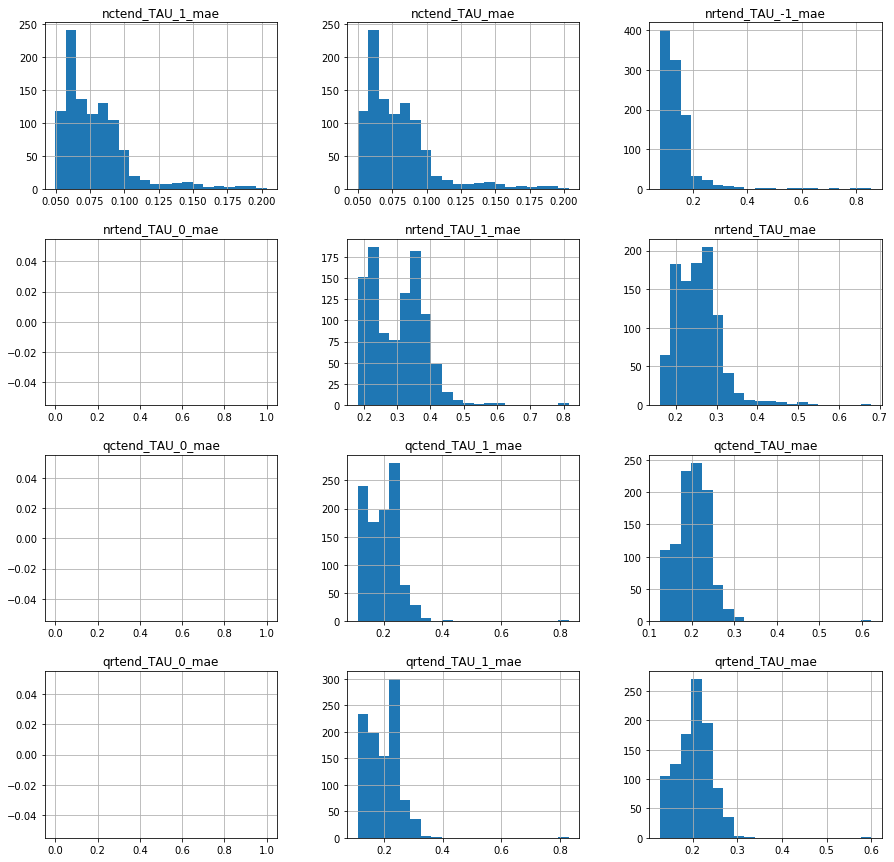

In [143]:
reg_metrics[summary_metrics.columns.levels[0]].hist(figsize=(15, 15), bins=20)

In [70]:
reg_metrics["qctend_TAU_1_mae"].argsort()

Config
DenseNeuralNetwork_DenseNeuralNetwork_0000    110
DenseNeuralNetwork_DenseNeuralNetwork_0001     27
DenseNeuralNetwork_DenseNeuralNetwork_0002     21
DenseNeuralNetwork_DenseNeuralNetwork_0003    105
DenseNeuralNetwork_DenseNeuralNetwork_0004     83
DenseNeuralNetwork_DenseNeuralNetwork_0005     80
DenseNeuralNetwork_DenseNeuralNetwork_0006    114
DenseNeuralNetwork_DenseNeuralNetwork_0007     18
DenseNeuralNetwork_DenseNeuralNetwork_0008     25
DenseNeuralNetwork_DenseNeuralNetwork_0009      5
DenseNeuralNetwork_DenseNeuralNetwork_0010     19
DenseNeuralNetwork_DenseNeuralNetwork_0011     67
DenseNeuralNetwork_DenseNeuralNetwork_0012    135
DenseNeuralNetwork_DenseNeuralNetwork_0013    131
DenseNeuralNetwork_DenseNeuralNetwork_0014     64
DenseNeuralNetwork_DenseNeuralNetwork_0015     13
DenseNeuralNetwork_DenseNeuralNetwork_0016     10
DenseNeuralNetwork_DenseNeuralNetwork_0017     63
DenseNeuralNetwork_DenseNeuralNetwork_0018    111
DenseNeuralNetwork_DenseNeuralNetwork_0019 

In [11]:
dnn_reg_config

,Unnamed: 0,activation,batch_size,epochs,hidden_layers,hidden_neurons,inputs,loss,lr,noise_sd,optimizer,output_activation,outputs,use_noise
Config,,,,,,,,,,,,,,
DenseNeuralNetwork_DenseNeuralNetwork_0000,0,relu,523,14,5,51,9,mse,0.001947,0.000226,adam,linear,1,0
DenseNeuralNetwork_DenseNeuralNetwork_0001,1,relu,1831,17,7,4,9,mse,0.009543,0.006909,adam,linear,1,0
DenseNeuralNetwork_DenseNeuralNetwork_0002,2,selu,1305,13,3,59,9,mse,0.004687,0.003151,adam,linear,1,1
DenseNeuralNetwork_DenseNeuralNetwork_0003,3,relu,1398,29,5,26,9,mse,0.003855,0.004654,adam,linear,1,1
DenseNeuralNetwork_DenseNeuralNetwork_0004,4,tanh,1212,12,4,53,9,mse,0.006975,0.002436,adam,linear,1,0
DenseNeuralNetwork_DenseNeuralNetwork_0005,5,selu,308,20,7,72,9,mse,0.001102,0.002102,adam,linear,1,1
DenseNeuralNetwork_DenseNeuralNetwork_0006,6,tanh,245,16,6,12,9,mse,0.002486,0.003585,adam,linear,1,0
DenseNeuralNetwork_DenseNeuralNetwork_0007,7,selu,778,17,6,27,9,mse,0.000540,0.002218,adam,linear,1,0
DenseNeuralNetwork_DenseNeuralNetwork_0008,8,relu,1898,16,5,27,9,mse,0.004611,0.002017,adam,linear,1,1


In [117]:
reg_metrics.iloc[reg_metrics["qctend_TAU_1_hellinger"].argsort().values]

,Unnamed: 0,activation,batch_size,epochs,hidden_layers,hidden_neurons,inputs,loss,lr,noise_sd,...,nrtend_TAU_0_mse,nrtend_TAU_0_mae,nrtend_TAU_0_r2,nrtend_TAU_0_hellinger,nrtend_TAU_1_mse,nrtend_TAU_1_mae,nrtend_TAU_1_r2,nrtend_TAU_1_hellinger,hidden_neurons_bins,hidden_layers_bins
Config,,,,,,,,,,,,,,,,,,,,,
DenseNeuralNetwork_DenseNeuralNetwork_0920,920,selu,1009,15,8,43,9,mse,0.007679,0.000757,...,NaN,NaN,NaN,NaN,0.088759,0.218840,0.913583,0.110448,42.250,7.5
DenseNeuralNetwork_DenseNeuralNetwork_0261,261,selu,344,15,7,14,9,mse,0.000585,0.008871,...,NaN,NaN,NaN,NaN,0.099212,0.223666,0.903406,0.070342,13.000,6.5
DenseNeuralNetwork_DenseNeuralNetwork_0128,128,selu,746,15,5,22,9,mse,0.004520,0.007713,...,NaN,NaN,NaN,NaN,0.133927,0.282065,0.869607,0.093064,19.750,4.5
DenseNeuralNetwork_DenseNeuralNetwork_0636,636,relu,120,15,4,19,9,mse,0.008152,0.009608,...,NaN,NaN,NaN,NaN,0.081569,0.200926,0.920583,0.063220,17.500,3.5
DenseNeuralNetwork_DenseNeuralNetwork_0033,33,selu,687,15,8,36,9,mse,0.000873,0.004748,...,NaN,NaN,NaN,NaN,0.093028,0.217982,0.909427,0.072513,35.500,7.5
DenseNeuralNetwork_DenseNeuralNetwork_0199,199,selu,1005,15,7,35,9,mse,0.007003,0.009399,...,NaN,NaN,NaN,NaN,0.121443,0.255678,0.881761,0.028334,33.250,6.5
DenseNeuralNetwork_DenseNeuralNetwork_0064,64,relu,308,15,6,30,9,mse,0.003598,0.009170,...,NaN,NaN,NaN,NaN,0.075580,0.193149,0.926415,0.061191,28.750,5.5
DenseNeuralNetwork_DenseNeuralNetwork_0043,43,selu,506,15,6,41,9,mse,0.004750,0.008509,...,NaN,NaN,NaN,NaN,0.081194,0.197613,0.920948,0.065715,40.000,5.5
DenseNeuralNetwork_DenseNeuralNetwork_0481,481,selu,404,15,8,44,9,mse,0.004981,0.007228,...,NaN,NaN,NaN,NaN,0.091384,0.210919,0.911027,0.072996,42.250,7.5


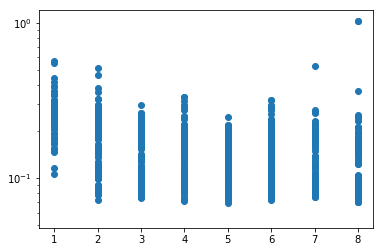

In [93]:
plt.scatter(reg_metrics["hidden_layers"] , reg_metrics["nrtend_TAU_1_mse"])
plt.gca().set_yscale("log")

[-0.5  0.5]
(2,)


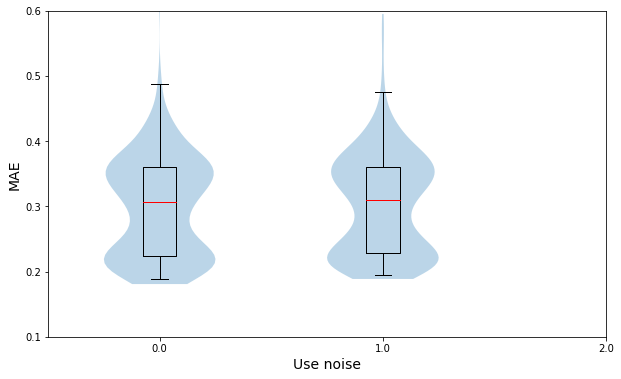

In [27]:
config_var = "use_noise"
metric = "mae"
#bins = np.arange(3.5, 52, 4)
#bins = np.arange(0.5, 9.5)
#bins = np.linspace(0.0001, 0.001, 10)
#bins= np.linspace(0.001, 0.01, 10)
bins = np.array([-0.5, 0.5, 1.5])
reg_metrics[f"{config_var}_bins"] = pd.IntervalIndex(pd.cut(reg_metrics[config_var], bins=bins)).left
param_vals = np.unique(reg_metrics[f"{config_var}_bins"].values)
param_vals = param_vals[~np.isnan(param_vals)]
print(param_vals)
param_dists = []
for h in param_vals:
    param_dists.append(reg_metrics.groupby(f"{config_var}_bins")[
        f"nrtend_TAU_1_{metric}"].get_group(h).dropna().values)
plt.figure(figsize=(10, 6))
plt.violinplot(param_dists, showextrema=False)
plt.boxplot(param_dists, whis=(1, 99), showfliers=False, medianprops={"color":"red"})
print(param_vals.shape)
plt.xticks(np.arange(1, len(bins) + 1), bins + 0.5)
plt.xlabel(config_var.replace("_", " ").capitalize(), fontsize=14)
plt.ylabel(metric.upper(), fontsize=14)
plt.ylim(0.1, 0.6)
plt.savefig(f"metric_box_{config_var}_{metric}.png", dpi=200, bbox_inches="tight")


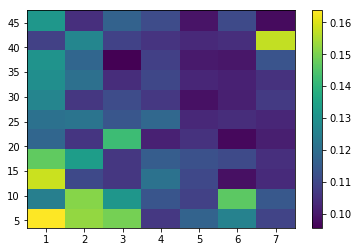

In [162]:
error_grid = reg_metrics.groupby(["hidden_neurons_bins", "hidden_layers_bins"])["qctend_TAU_mse"].min().unstack()
plt.pcolormesh(error_grid.columns, error_grid.index, error_grid.values)
plt.colorbar()

In [149]:
for col in reg_metrics.columns:
    print(col)

Unnamed: 0
activation
batch_size
epochs
hidden_layers
hidden_neurons
inputs
loss
lr
noise_sd
optimizer
output_activation
outputs
use_noise
qctend_TAU_acc
qctend_TAU_pss
qctend_TAU_hss
qctend_TAU_mse
qctend_TAU_mae
qctend_TAU_r2
qctend_TAU_hellinger
qctend_TAU_0_mse
qctend_TAU_0_mae
qctend_TAU_0_r2
qctend_TAU_0_hellinger
qctend_TAU_1_mse
qctend_TAU_1_mae
qctend_TAU_1_r2
qctend_TAU_1_hellinger
qrtend_TAU_acc
qrtend_TAU_pss
qrtend_TAU_hss
qrtend_TAU_mse
qrtend_TAU_mae
qrtend_TAU_r2
qrtend_TAU_hellinger
qrtend_TAU_0_mse
qrtend_TAU_0_mae
qrtend_TAU_0_r2
qrtend_TAU_0_hellinger
qrtend_TAU_1_mse
qrtend_TAU_1_mae
qrtend_TAU_1_r2
qrtend_TAU_1_hellinger
nctend_TAU_acc
nctend_TAU_pss
nctend_TAU_hss
nctend_TAU_mse
nctend_TAU_mae
nctend_TAU_r2
nctend_TAU_hellinger
nctend_TAU_1_mse
nctend_TAU_1_mae
nctend_TAU_1_r2
nctend_TAU_1_hellinger
nrtend_TAU_acc
nrtend_TAU_pss
nrtend_TAU_hss
nrtend_TAU_mse
nrtend_TAU_mae
nrtend_TAU_r2
nrtend_TAU_hellinger
nrtend_TAU_-1_mse
nrtend_TAU_-1_mae
nrtend_TAU_-1_r2
nrt